In [4]:
import numpy as np, pandas as pd, random
from matplotlib import pyplot
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from scipy.stats import sem
import math

<AxesSubplot:xlabel='x'>

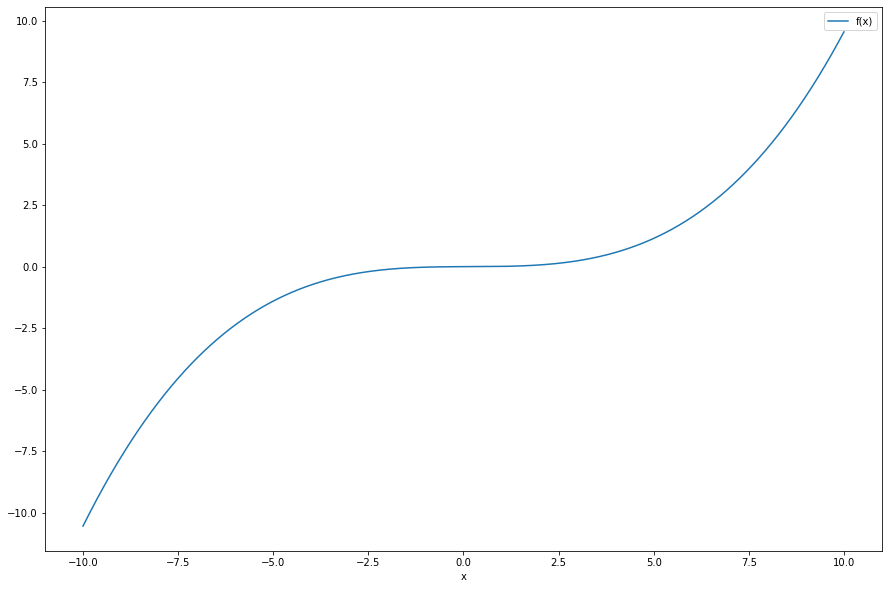

In [52]:
df = pd.DataFrame()
df['x'] = np.arange(-10, 10, 0.001)
df['f(x)'] = df['x'].apply(lambda x: 2*x**3 - x**2 + x)/200
#df['f2(x)'] = df['x'].apply(lambda x: 1/x - (1/x) * (0.2 - random.random()*0.4))
#df.plot(y=['f(x)', 'f2(x)'], x='x', figsize=[15,10])
df.plot(y=['f(x)'], x='x', figsize=[15,10])

<AxesSubplot:xlabel='x'>

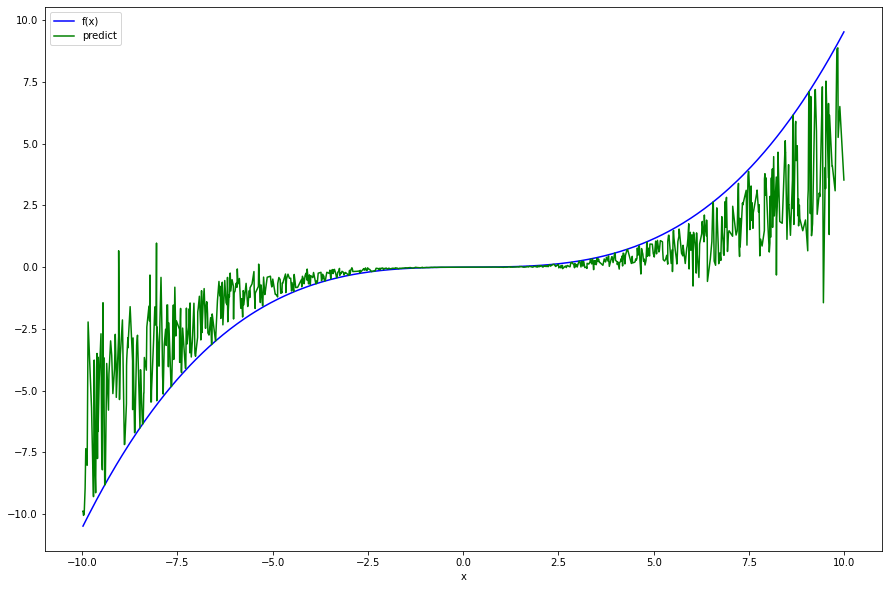

In [64]:
# msk = np.random.rand(len(df)) < 0.8
# train = df[msk]
# test = df[~msk]

tmp = df.sample(1000).sort_values('x')
X = tmp['x']
X = np.array(X)[:,None]**2
y = tmp['f(x)']

# regressor = DecisionTreeRegressor(max_depth=50)
# regressor = KNeighborsRegressor(n_neighbors=3)
regressor = RandomForestRegressor(max_depth=100, random_state=0)
# regressor = LogisticRegression()
regressor.fit(X, y)

array = []

for x in X:
    array.append(regressor.predict([x])[0])
    
tmp['predict'] = array


tmp.plot(y=['f(x)', 'predict'], color=['b', 'g'], x='x', figsize=[15, 10])

>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


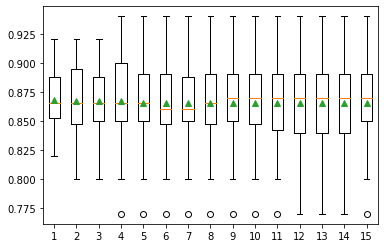

In [68]:
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

<AxesSubplot:xlabel='x'>

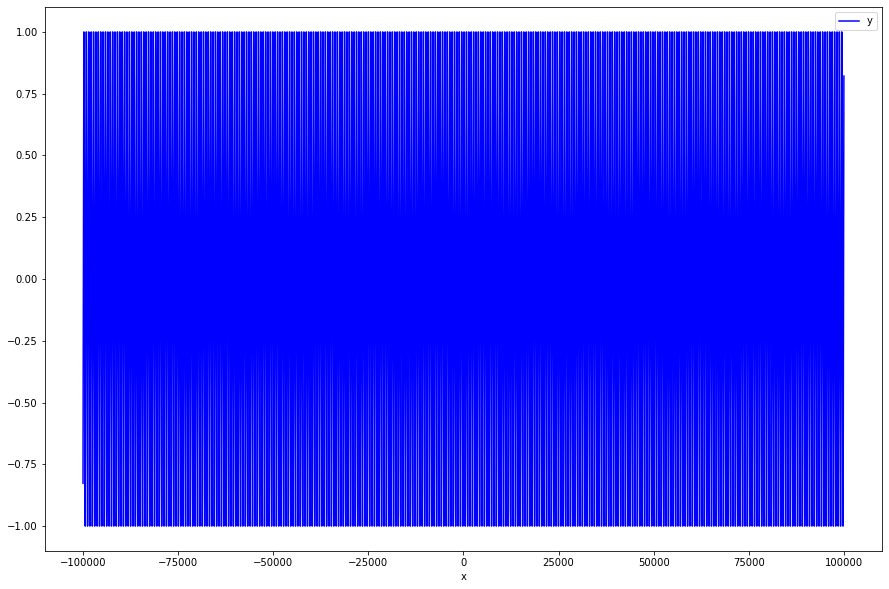

In [35]:
df3 = pd.DataFrame()
df3['x'] = np.arange(-100000, 100000, 1)
df3['y'] = df3['x'].apply(lambda x: math.sin(x/100))

df3.plot(y=['y'], color=['b', 'g'], x='x', figsize=[15, 10])
